<a href="https://colab.research.google.com/github/Alagu-Sri-Sakthi/Sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Embedding,LSTM,Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import re

In [4]:
df=pd.read_csv('/content/Kenjee.csv')

In [5]:
df.drop(['Date','VidId','Comment_ID'],axis=1,inplace=True)
df

,Comments,Reply_Count,Like_Count,user_ID
0,Thanks for this video Ken.\n\nI decided to go ...,0,0,user_981
1,Hello ken jee!!! I'm doing a graduation on Com...,0,0,user_213
2,"Thanks for this video, man. So useful. I'll me...",0,0,user_1065
3,Great video!!! I started learning Python 8 mon...,0,0,user_3391
4,Been watching hours of your material (and Tina...,0,0,user_2816
...,...,...,...,...
10235,"Dear Ken,\nMay I know how the input data with ...",1,0,user_5850
10236,What's your prediction Ken for 2018 or at leas...,0,0,user_2676
10237,Nice. I have some nice models for this doing v...,0,0,user_4533
10238,Great video! Can you please post the github li...,0,0,user_3368


In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Comments       0
Reply_Count    0
Like_Count     0
user_ID        0
dtype: int64

In [8]:
df['Like_Count']=df['Like_Count'].astype(int)

In [9]:

df['Reply_Count']=df['Reply_Count'].astype(int)

In [10]:
df.head()

,Comments,Reply_Count,Like_Count,user_ID
0,Thanks for this video Ken.\n\nI decided to go ...,0,0,user_981
1,Hello ken jee!!! I'm doing a graduation on Com...,0,0,user_213
2,"Thanks for this video, man. So useful. I'll me...",0,0,user_1065
3,Great video!!! I started learning Python 8 mon...,0,0,user_3391
4,Been watching hours of your material (and Tina...,0,0,user_2816


In [11]:
df['S_score']=df['Comments'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [12]:
df['sentiment']=df['S_score'].apply(lambda s:'postive' if s>0 else ('neutral' if s==0 else 'negative'))

In [13]:
df['Comments']=df['Comments'].replace({'<.*?>': ''}, regex = True)
df['Comments']=df['Comments'].replace({'[^A-Za-z]': ' '}, regex = True)

In [45]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stops = set(stopwords.words('english'))
df['Comments']=df['Comments'].apply(lambda review: [w for w in review.split() if w not in english_stops])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: ignored

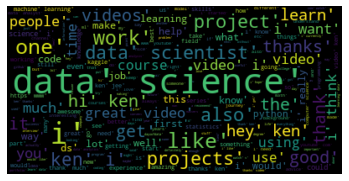

In [42]:
import wordcloud


common_words=''
for i in df.Comments:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
df['Comments']=df['Comments'].apply(lambda review: [w.lower() for w in review])

In [19]:
df['Comments']

0        [thanks, video, ken, i, decided, go, tech, lea...
1        [hello, ken, jee, i, graduation, computer, sci...
2        [thanks, video, man, so, useful, i, meet, i, s...
3        [great, video, i, started, learning, python, m...
4        [been, watching, hours, material, tina, i, kno...
                               ...                        
10235    [dear, ken, may, i, know, input, data, open, h...
10236    [what, prediction, ken, least, next, months, t...
10237             [nice, i, nice, models, well, how, make]
10238    [great, video, can, please, post, github, link...
10239    [hi, ken, i, researching, would, really, helpf...
Name: Comments, Length: 10239, dtype: object

In [20]:
df

,Comments,Reply_Count,Like_Count,user_ID,S_score,sentiment
0,"[thanks, video, ken, i, decided, go, tech, lea...",0,0,user_981,0.9245,postive
1,"[hello, ken, jee, i, graduation, computer, sci...",0,0,user_213,0.9350,postive
2,"[thanks, video, man, so, useful, i, meet, i, s...",0,0,user_1065,0.7264,postive
3,"[great, video, i, started, learning, python, m...",0,0,user_3391,0.9425,postive
4,"[been, watching, hours, material, tina, i, kno...",0,0,user_2816,0.7347,postive
...,...,...,...,...,...,...
10235,"[dear, ken, may, i, know, input, data, open, h...",1,0,user_5850,0.4515,postive
10236,"[what, prediction, ken, least, next, months, t...",0,0,user_2676,0.0000,neutral
10237,"[nice, i, nice, models, well, how, make]",0,0,user_4533,0.7902,postive
10238,"[great, video, can, please, post, github, link...",0,0,user_3368,0.8478,postive


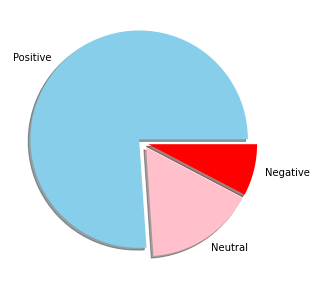

In [21]:
y = df['sentiment'].value_counts()
lab = ["Positive","Neutral","Negative"]
exp = [0.05, 0.05,0.05]
col= ['skyblue','pink','red']
plt.figure(figsize=(5,5))
plt.pie(y, labels = lab, explode = exp, colors = col, shadow = True)
plt.show() 

In [22]:
df['sentiment'].value_counts()

postive     7790
neutral     1663
negative     786
Name: sentiment, dtype: int64

In [23]:
x=df['Comments']
y=df['sentiment']
x.shape,y.shape

((10239,), (10239,))

In [24]:
y=y.replace('postive',1)
y=y.replace('neutral',0)
y=y.replace('negative',-1)

In [25]:
y.dtype

dtype('int64')

In [26]:
x.dtype

dtype('O')

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [28]:
x_train.shape,

((8191,),)

In [29]:
x_test.shape

(2048,)

In [30]:
def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
token=Tokenizer()
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

In [32]:
df

,Comments,Reply_Count,Like_Count,user_ID,S_score,sentiment
0,"[thanks, video, ken, i, decided, go, tech, lea...",0,0,user_981,0.9245,postive
1,"[hello, ken, jee, i, graduation, computer, sci...",0,0,user_213,0.9350,postive
2,"[thanks, video, man, so, useful, i, meet, i, s...",0,0,user_1065,0.7264,postive
3,"[great, video, i, started, learning, python, m...",0,0,user_3391,0.9425,postive
4,"[been, watching, hours, material, tina, i, kno...",0,0,user_2816,0.7347,postive
...,...,...,...,...,...,...
10235,"[dear, ken, may, i, know, input, data, open, h...",1,0,user_5850,0.4515,postive
10236,"[what, prediction, ken, least, next, months, t...",0,0,user_2676,0.0000,neutral
10237,"[nice, i, nice, models, well, how, make]",0,0,user_4533,0.7902,postive
10238,"[great, video, can, please, post, github, link...",0,0,user_3368,0.8478,postive


In [33]:
max_length=get_max_length()
x_train=pad_sequences(x_train,maxlen=max_length,padding='post',truncating='post')
x_test=pad_sequences(x_test,maxlen=max_length,padding='post',truncating='post')

In [34]:
total_words = len(token.word_index) + 1
total_words

11306

In [35]:
max_length

20

In [36]:
EMBED_DIM=32
LSTM_OUT=64

model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model.add(LSTM(LSTM_OUT))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            361792    
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 386,689
Trainable params: 386,689
Non-trainable params: 0
_________________________________________________________________


In [37]:
checkpoint = ModelCheckpoint(
    'models/LSTM.h5',
    monitor='accuracy',
    save_best_only=True,
    verbose=1
)

In [38]:
model.fit(x_train, y_train, batch_size = 128, epochs = 5, callbacks=[checkpoint])

Epoch 1/5
64/64 [==============================] - ETA: 0s - loss: 0.6079 - accuracy: 0.7556
Epoch 1: accuracy improved from -inf to 0.75559, saving model to models/LSTM.h5
64/64 [==============================] - 6s 44ms/step - loss: 0.6079 - accuracy: 0.7556
Epoch 2/5
64/64 [==============================] - ETA: 0s - loss: 0.2524 - accuracy: 0.8106
Epoch 2: accuracy improved from 0.75559 to 0.81065, saving model to models/LSTM.h5
64/64 [==============================] - 3s 40ms/step - loss: 0.2524 - accuracy: 0.8106
Epoch 3/5
64/64 [==============================] - ETA: 0s - loss: -0.3684 - accuracy: 0.8627
Epoch 3: accuracy improved from 0.81065 to 0.86265, saving model to models/LSTM.h5
64/64 [==============================] - 3s 41ms/step - loss: -0.3684 - accuracy: 0.8627
Epoch 4/5
64/64 [==============================] - ETA: 0s - loss: -0.9765 - accuracy: 0.8649
Epoch 4: accuracy improved from 0.86265 to 0.86485, saving model to models/LSTM.h5
64/64 [=========================

In [39]:

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import  BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('BNB', BernoulliNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBM', AdaBoostClassifier()))
models.append(('NN', MLPClassifier()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, x_train,y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LR: 0.758272 (0.009645)
LDA: 0.755953 (0.010738)
KNN: 0.721402 (0.012632)
CART: 0.688683 (0.020480)
BNB: 0.620071 (0.015517)
RF: 0.784154 (0.007315)
GBM: 0.773410 (0.009046)


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


NN: 0.632397 (0.048551)
SVM: 0.760470 (0.009573)


In [40]:
#result:  Accuracy and standard deviation of that.


'''
Logistic Regression (LR)                  : 0.758272 (0.009645)
Linear Discriminant Analysis (LDA)        : 0.755953 (0.010738)
K Neighbors Classifier (KNN)              : 0.721402 (0.012632)
Decision Tree Classifier (CART)           : 0.688683 (0.020480)
Bernoulli Naive Bayes (BNB)               : 0.620071 (0.015517)
RandomForest Classifier (RF)              : 0.784154 (0.007315)
AdaBoost Classifier (GBM)                 : 0.773410 (0.009046)
Multi-Layer Perceptron Classifier (NN)    : 0.632397 (0.048551)
Support Vector Machine (SVM)              : 0.760470 (0.009573)
LSTM(Long Short-term Memory)              : loss: -1.4631 - accuracy: 0.8712

'''
